# Global modes of a radially inhomogeneous gaseous cylinder

In [1]:
### Packages 

from dedalus import public as de
from eigentools import Eigenproblem

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["New Century Schoolbook"],
    "figure.figsize": (7,4)
})

def simpleaxis(ax,xlabel,ylabel,rotation=90):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlabel,size=18)
    ax.set_ylabel(ylabel,size=18,rotation=rotation)
    return ax

j = complex(0,1)

In [2]:
### Functions

def locModes(eigenPb,order,domain,zbasis):
    # Computation of the average position of an eigenmode over the density of kinetic energy
    locs=[]
    for modei in order:
        u = np.copy(eigenPb.eigenmode(modei).fields[0]['g'])
        w = np.copy(eigenPb.eigenmode(modei).fields[1]['g'])
        u2 = np.real(u*u.conjugate())
        w2 = np.real(w*w.conjugate())
        norm = domain.new_field(name='norm')
        norm['g'] = u2 + w2
        moment1 = domain.new_field(name='mom1')
        moment1['g'] = zbasis.grid(scale=1)*(u2 + w2)
        
        locs.append(
            zbasis.Integrate(moment1).evaluate()['g'][0].real / zbasis.Integrate(norm).evaluate()['g'][0].real
            )
    return np.array(locs)

def getEigenMode(omegaTarget,kTarget,ks,omegas,modes):
    idx = ( np.abs(omegas - omegaTarget) + np.abs(ks-kTarget) ).argmin()
    vr,vz,vθ,h = modes[idx]
    
    return omegas[idx],ks[idx],vr,vz,vθ,h

In [3]:
### Parameters

Rout = 1.5
a    = 0.1    #H0/R0
p    = 1      #surface density power
q    = 0.5    #temperature power
s    = 3/2    #rotation power

Nr = 32
spaceKs = np.linspace(-20,20,40+1) #vertical wavenumbers

driftThresh = 1e6 

2024-02-15 15:32:22,642 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:22,674 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


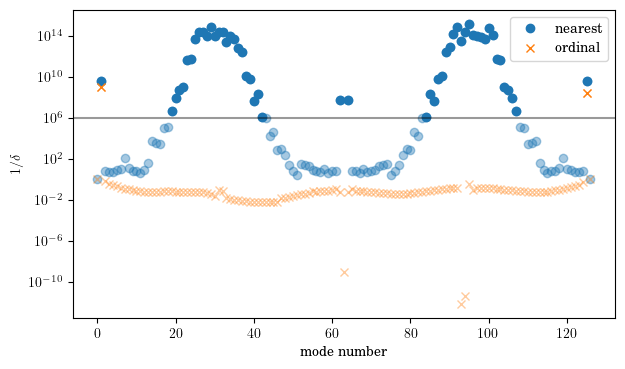

----- I find 53 modes for kz=-20.0
2024-02-15 15:32:24,773 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:24,785 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


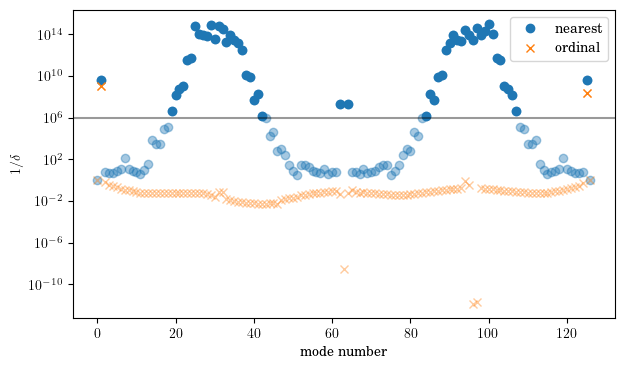

----- I find 53 modes for kz=-19.0
2024-02-15 15:32:25,273 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:25,285 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


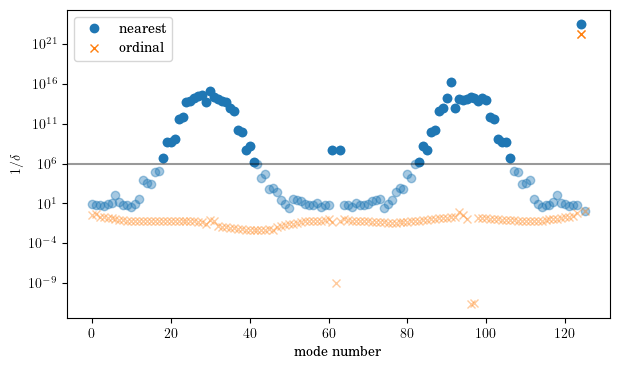

----- I find 52 modes for kz=-18.0
2024-02-15 15:32:25,770 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:25,782 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


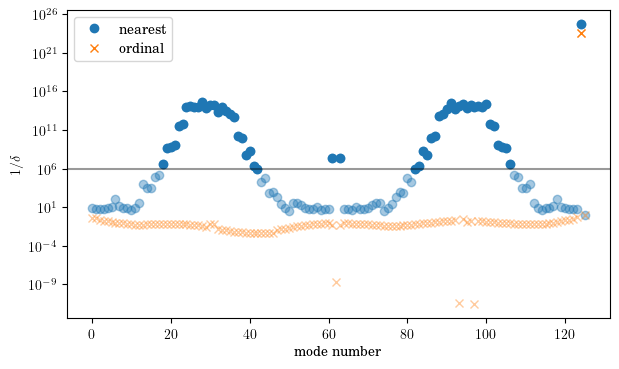

----- I find 54 modes for kz=-17.0
2024-02-15 15:32:26,273 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:26,285 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


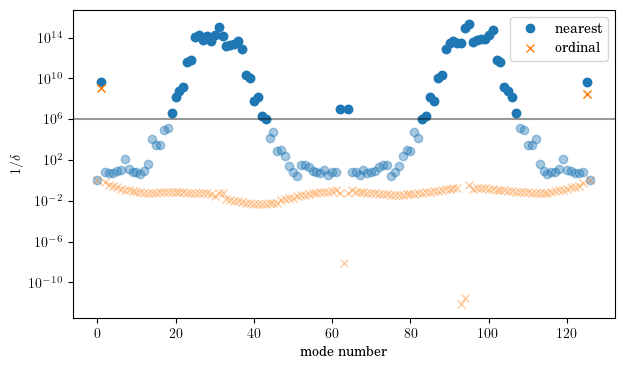

----- I find 55 modes for kz=-16.0
2024-02-15 15:32:26,768 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:26,853 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


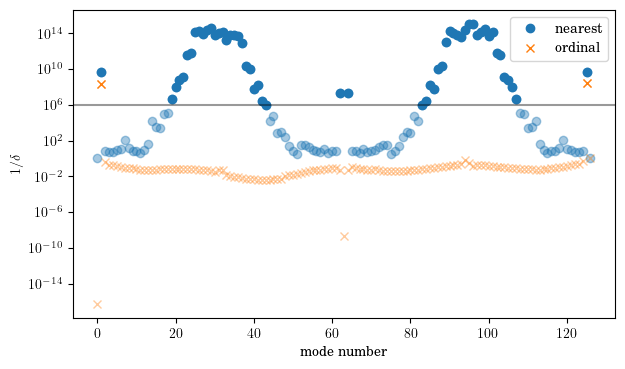

----- I find 55 modes for kz=-15.0
2024-02-15 15:32:27,343 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:27,354 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


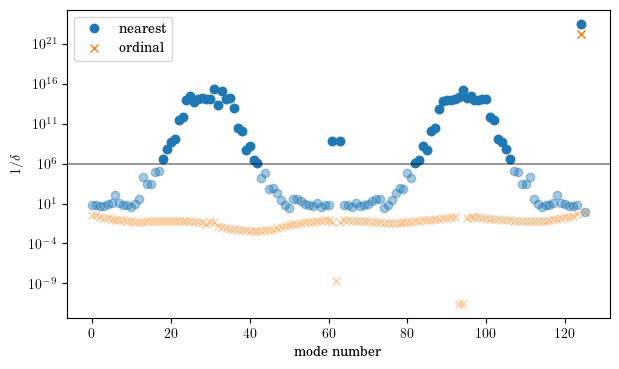

----- I find 54 modes for kz=-14.0
2024-02-15 15:32:27,837 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:27,849 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


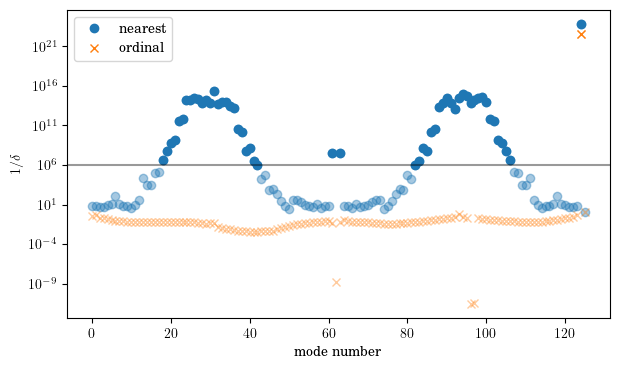

----- I find 54 modes for kz=-13.0
2024-02-15 15:32:28,335 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:28,346 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


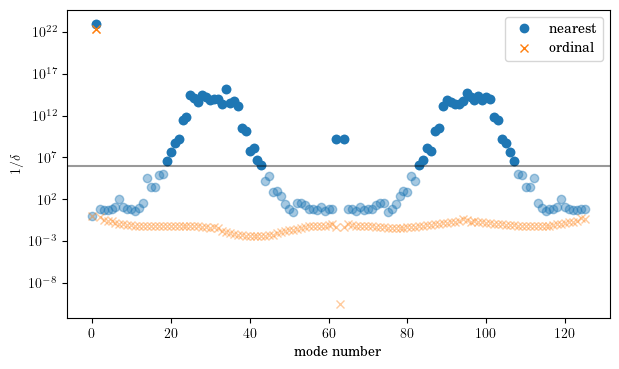

----- I find 54 modes for kz=-12.0
2024-02-15 15:32:28,832 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:28,843 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


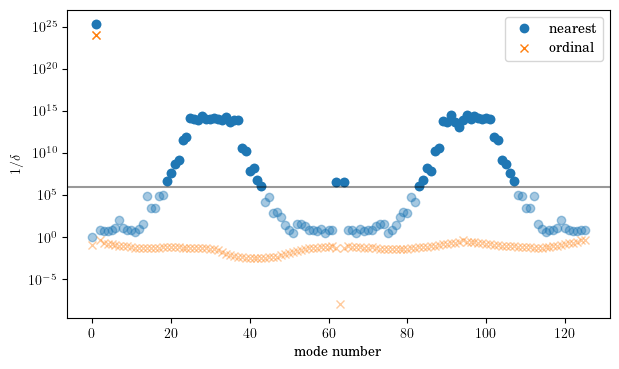

----- I find 54 modes for kz=-11.0
2024-02-15 15:32:29,331 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:29,343 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


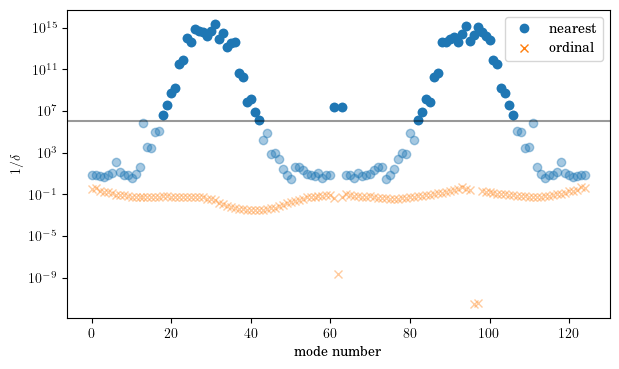

----- I find 53 modes for kz=-10.0
2024-02-15 15:32:29,826 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:29,913 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


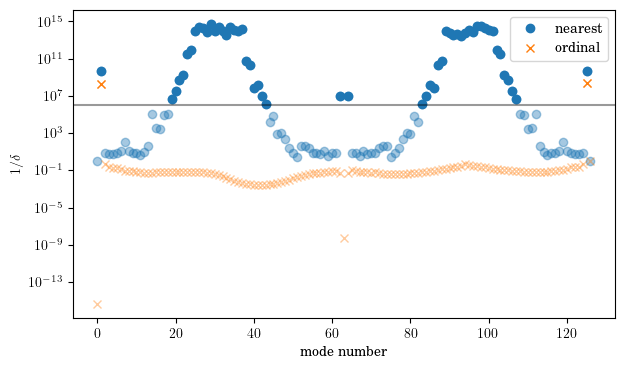

----- I find 55 modes for kz=-9.0
2024-02-15 15:32:30,406 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:30,417 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


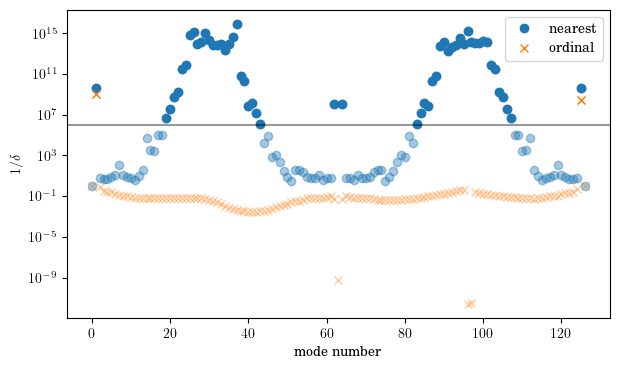

----- I find 55 modes for kz=-8.0
2024-02-15 15:32:30,903 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:30,914 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


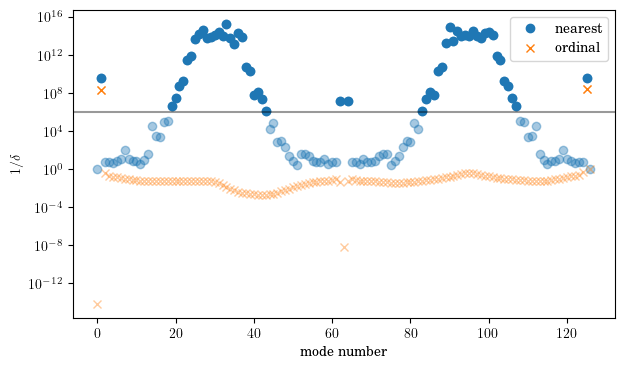

----- I find 55 modes for kz=-7.0
2024-02-15 15:32:31,402 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:31,414 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


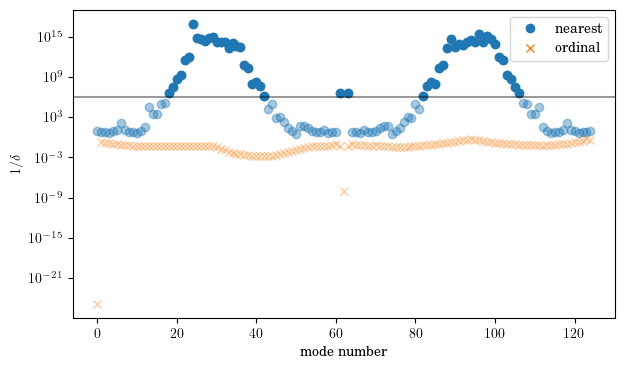

----- I find 53 modes for kz=-6.0
2024-02-15 15:32:31,898 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:31,910 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


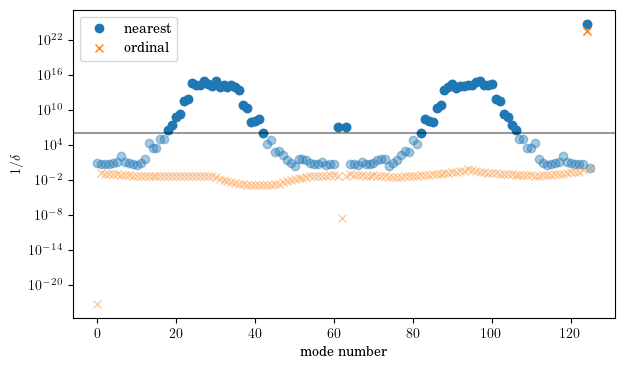

----- I find 54 modes for kz=-5.0
2024-02-15 15:32:32,398 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:32,409 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


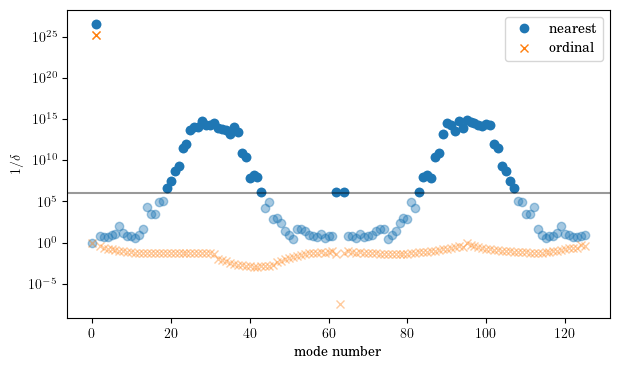

----- I find 54 modes for kz=-4.0
2024-02-15 15:32:32,881 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:32,893 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


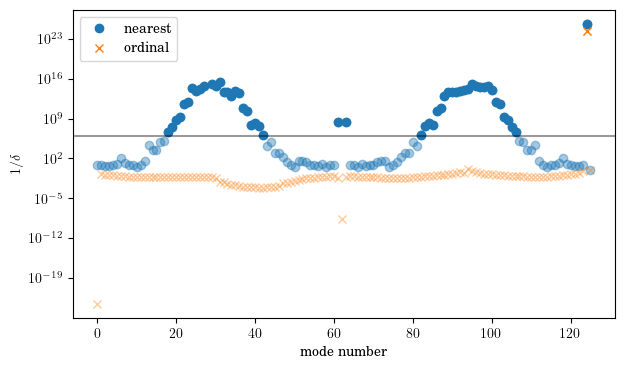

----- I find 54 modes for kz=-3.0
2024-02-15 15:32:33,371 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:33,464 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


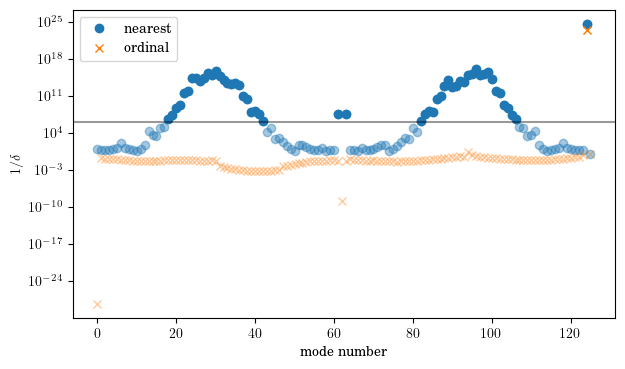

----- I find 54 modes for kz=-2.0
2024-02-15 15:32:33,944 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:33,956 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


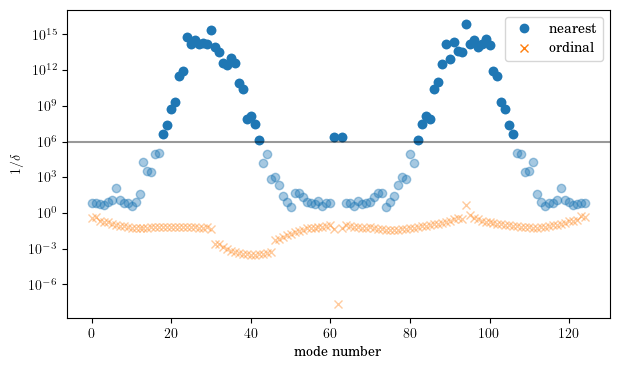

----- I find 53 modes for kz=-1.0
2024-02-15 15:32:34,428 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:34,441 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:694: RuntimeWarning: divide by zero encountered in double_scalars
  self.delta_ordinal = np.array([np.abs(eval_low_sorted[j] - eval_hi_sorted[j])/sigmas[j] for j in range(len(eval_low_sorted))])
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:694: RuntimeWarning: invalid value encountered in double_scalars
  self.delta_ordinal = np.array([np.abs(eval_low_sorted[j] - eval_hi_sorted[j])/sigmas[j] for j in range(len(eval_low_sorted))])
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:697: RuntimeWarning: divide by zero encountered in divide
  self.delta_near = np.array([np.nanmin(np.abs(eval_low_sorted[j] - eval_hi_sorted)/sigmas[j]) for j in range(len(eval_low_sorted))])
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:697: RuntimeWarning: invalid value encountered in divide
  self.delta_near = np.array([np.nanmi

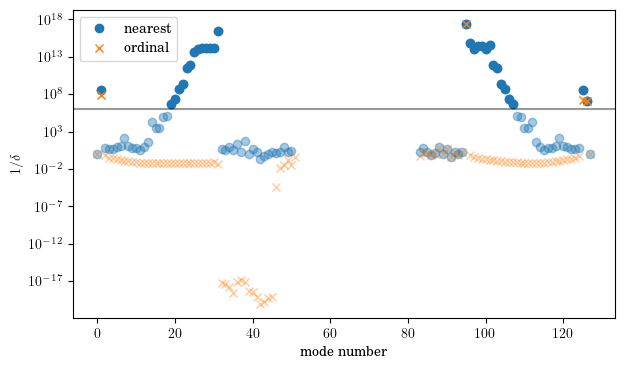

----- I find 31 modes for kz=0.0
2024-02-15 15:32:34,839 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:34,850 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


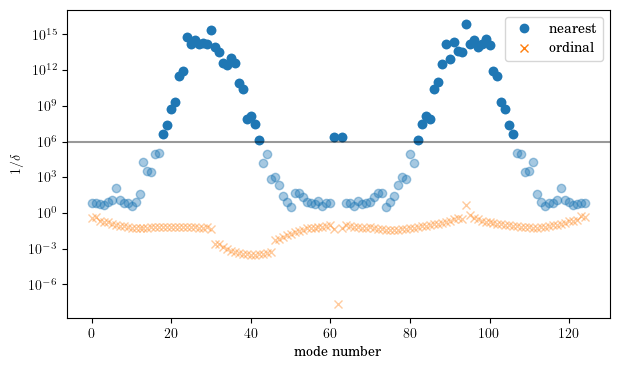

----- I find 53 modes for kz=1.0
2024-02-15 15:32:35,324 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:35,335 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


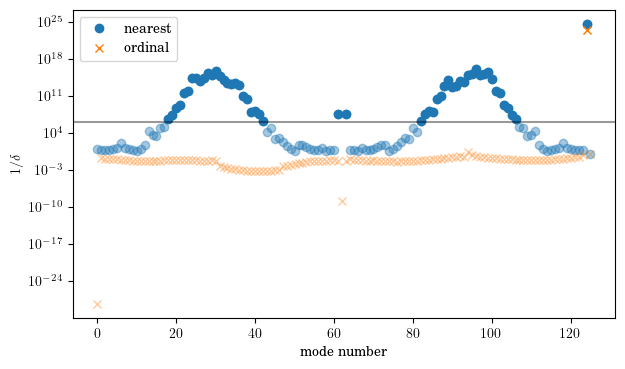

----- I find 54 modes for kz=2.0
2024-02-15 15:32:35,813 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:35,825 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


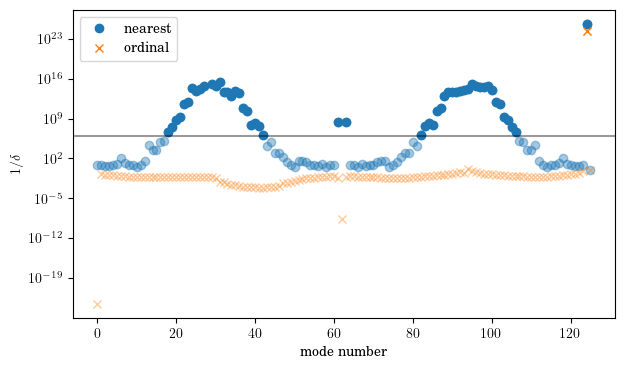

----- I find 54 modes for kz=3.0
2024-02-15 15:32:36,295 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:36,366 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


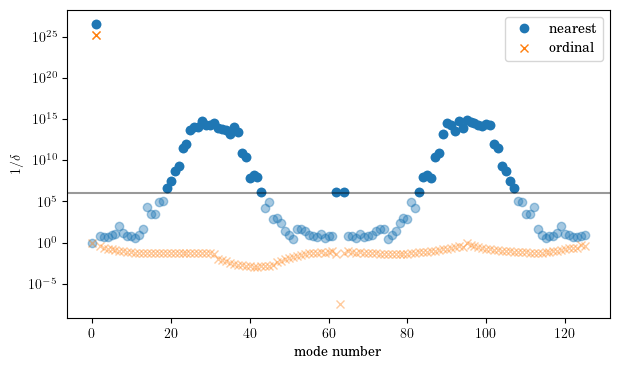

----- I find 54 modes for kz=4.0
2024-02-15 15:32:36,842 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:36,853 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


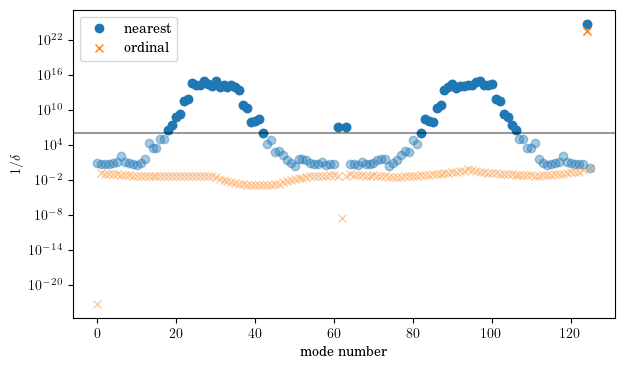

----- I find 54 modes for kz=5.0
2024-02-15 15:32:37,335 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:37,347 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


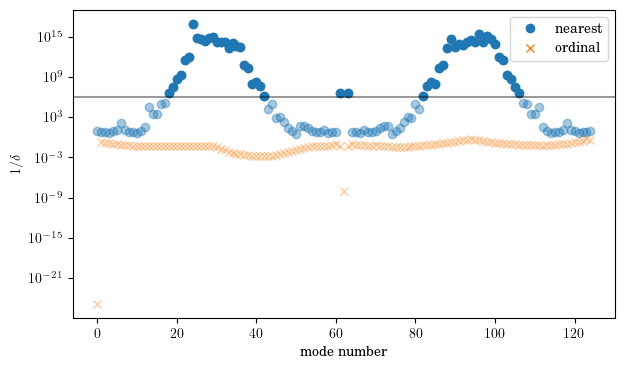

----- I find 53 modes for kz=6.0
2024-02-15 15:32:37,823 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:37,834 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


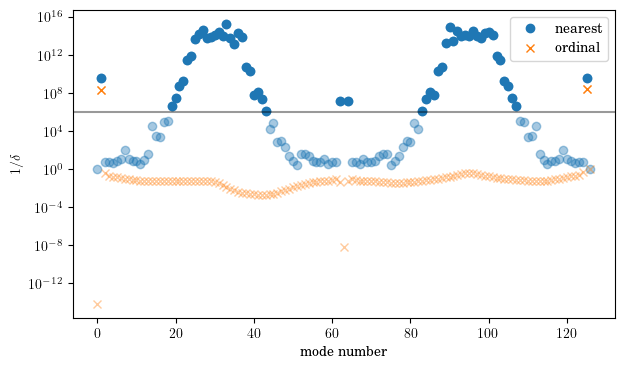

----- I find 55 modes for kz=7.0
2024-02-15 15:32:38,318 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:38,329 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


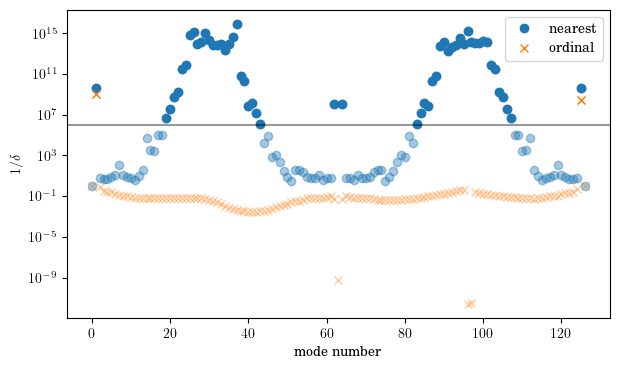

----- I find 55 modes for kz=8.0
2024-02-15 15:32:38,812 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:38,823 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


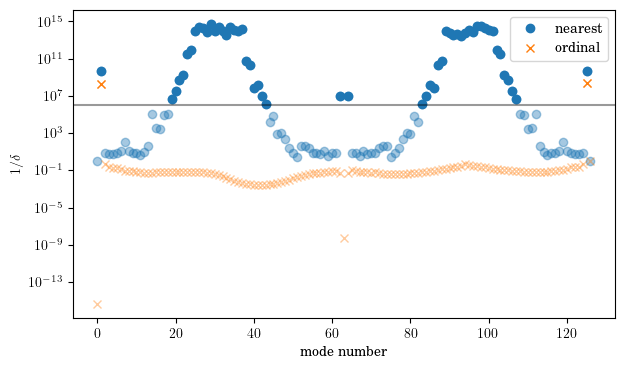

----- I find 55 modes for kz=9.0
2024-02-15 15:32:39,313 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:39,380 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


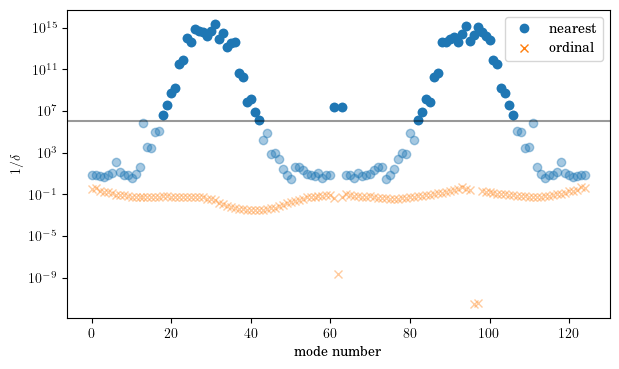

----- I find 53 modes for kz=10.0
2024-02-15 15:32:39,863 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:39,875 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


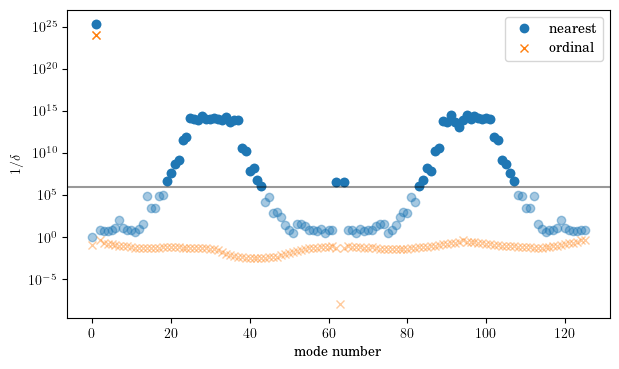

----- I find 54 modes for kz=11.0
2024-02-15 15:32:40,356 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:40,367 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


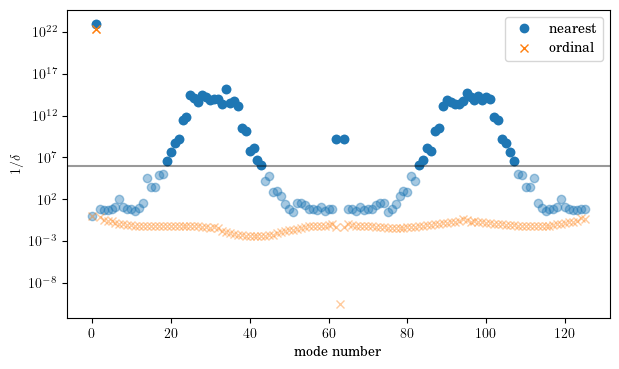

----- I find 54 modes for kz=12.0
2024-02-15 15:32:40,846 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:40,857 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


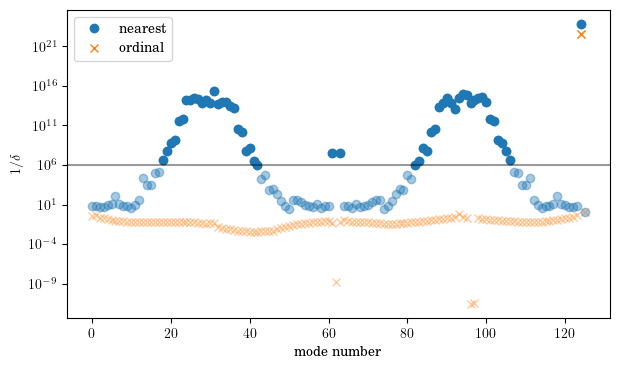

----- I find 54 modes for kz=13.0
2024-02-15 15:32:41,335 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:41,347 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


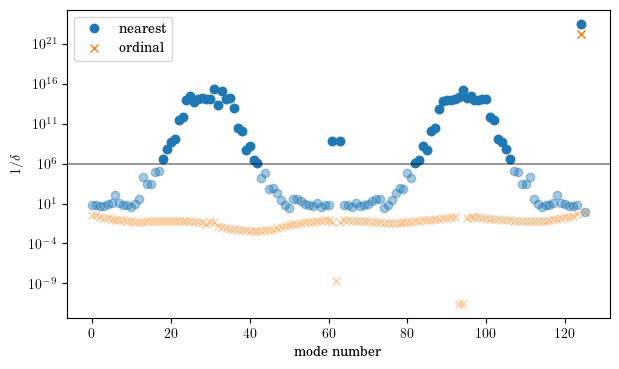

----- I find 54 modes for kz=14.0
2024-02-15 15:32:41,830 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:41,842 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


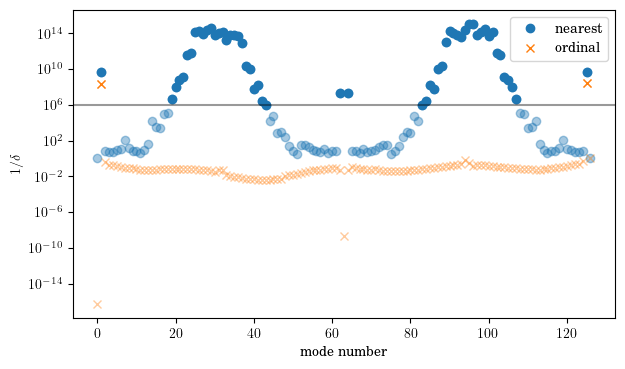

----- I find 55 modes for kz=15.0
2024-02-15 15:32:42,327 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:42,338 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


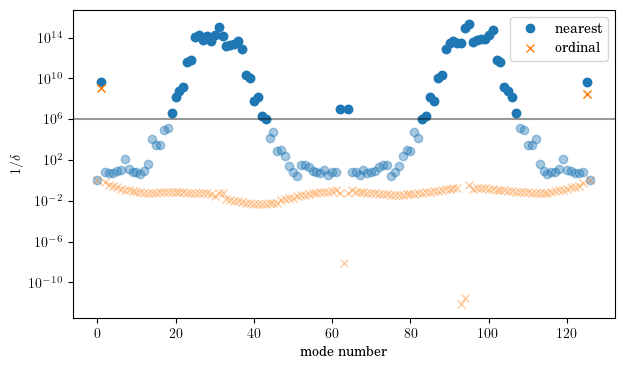

----- I find 55 modes for kz=16.0
2024-02-15 15:32:42,817 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:42,892 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


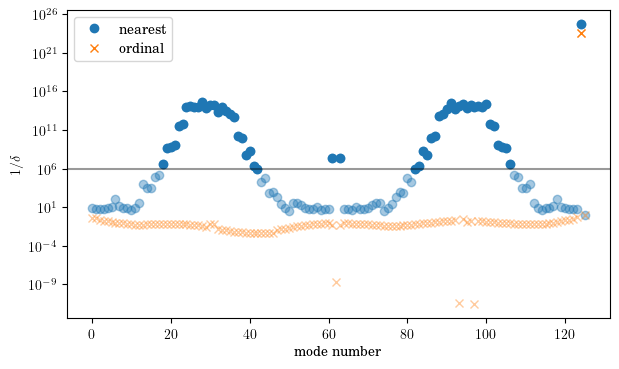

----- I find 54 modes for kz=17.0
2024-02-15 15:32:43,375 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:43,386 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


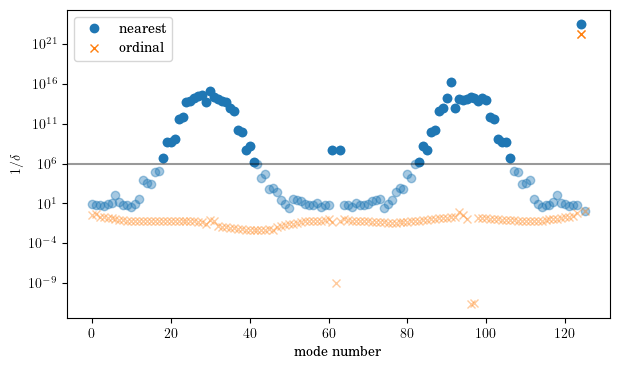

----- I find 52 modes for kz=18.0
2024-02-15 15:32:43,866 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:43,878 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


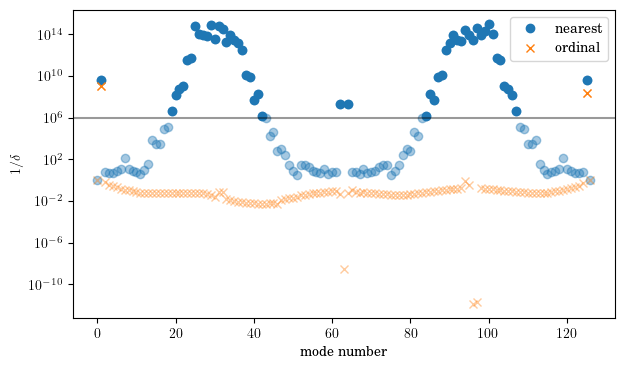

----- I find 53 modes for kz=19.0
2024-02-15 15:32:44,353 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2024-02-15 15:32:44,365 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:703: RuntimeWarning: divide by zero encountered in divide
  inverse_drift = 1/self.delta_near
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:733: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers,1/self.delta_near,'o',alpha=0.4)
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:737: RuntimeWarning: divide by zero encountered in divide
  good_near = 1/self.delta_near > self.drift_threshold
/home/alecle02/miniconda3/lib/python3.9/site-packages/eigentools/eigenproblem.py:739: RuntimeWarning: divide by zero encountered in divide
  ax.semilogy(mode_numbers[good_near],1/self.delta_near[good_near],'o', label='nearest')


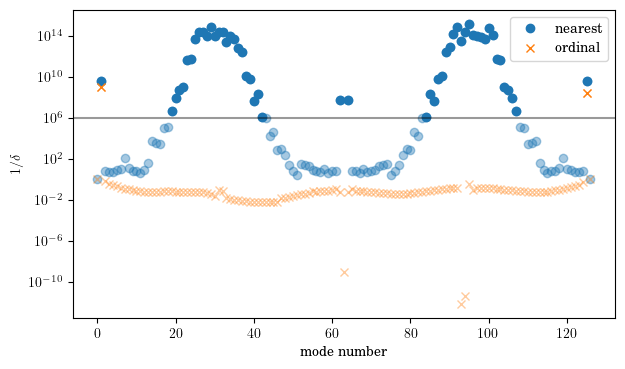

----- I find 53 modes for kz=20.0
----------------
Done!


In [4]:
### Simulation

ks, omegas, locs, modes = [],[],[],[]

rbasis = de.Chebyshev('r', Nr, interval = (1.0,Rout))
domain = de.Domain([rbasis],  mesh=[1])
r = rbasis.grid(scale=1) #spatial points for plots

#solving a problem for every value of kz
for k in spaceKs:
    #setting up EVP problem
    problem = de.EVP(domain, 
                     variables=['vr','vz','vθ','h'], 
                     eigenvalue='σ')
    problem.meta[:]['r']['dirichlet'] = True
    
    #parameters
    cs = domain.new_field(name='c')
    cs['g'] = a*(r**(-q/2))
    dcdr = domain.new_field(name='dcdr')
    dcdr['g'] = (-q/2)*a*(r**(-q/2-1))
    strat = domain.new_field(name='S')
    strat['g'] = cs['g']*(1/(2*r) + (-p+q/2-s)/(2*r)) + dcdr['g']/2
    rot = domain.new_field(name='kap')
    rot['g'] = np.sqrt(2*(2-s))*(r**(-s))
    waveNumber = domain.new_field(name='k')
    waveNumber['g'] = k
    
    problem.parameters['c']     = cs
    problem.parameters['dcdr']  = dcdr
    problem.parameters['S']     = strat
    problem.parameters['kap']   = rot
    problem.parameters['k']     = waveNumber
    problem.parameters['j']     = complex(0,1)
    
    #system of eqs
    problem.add_equation("-σ*vz                    +  c*k*h   = 0")
    problem.add_equation("-σ*vr + j*kap*vθ -j*S*h + j*c*dr(h) =  0")
    problem.add_equation("-σ*vθ -j*kap*vr                     = 0")
    problem.add_equation("-σ*h + c*k*vz +j*S*vr + j*c*dr(vr) =  0")

    
    #BCs
    problem.add_bc("left(vr)  =0")
    problem.add_bc("right(vr) =0")
    
    #solving
    EP = Eigenproblem(problem,reject=True, drift_threshold=driftThresh, use_ordinal=False)
    EP.solve(sparse=False)
    EP.plot_drift_ratios()  #plot selection of "well-converged" modes
    plt.show()
    
    freqs = EP.evalues
    order = range(len(freqs))
    print("----- I find {} modes for kz={:.1f}".format(len(freqs),k))
    
    #localization of modes
    localizations = locModes(EP,order,domain,rbasis)
    
    #recording results
    ks       +=[k                 for i in order]
    locs     +=[localizations[i]  for i in order]
    omegas   +=[np.real(freqs[i]) for i in order]
    modes    +=[ [np.copy(EP.eigenmode(i).fields[0]['g']),np.copy(EP.eigenmode(i).fields[1]['g']),np.copy(EP.eigenmode(i).fields[2]['g']),np.copy(EP.eigenmode(i).fields[3]['g'])] for i in order]

    

omegas,modes,ks,locs = np.array(omegas),np.array(modes),np.array(ks),np.array(locs)
omegas,modes,ks,locs = omegas[omegas<5],modes[omegas<5],ks[omegas<5],locs[omegas<5] 
print("----------------")
print("Done!")

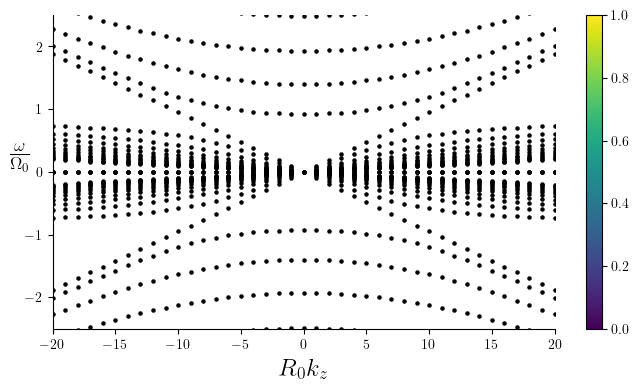

In [5]:
### Plot of global dispersion relation

fig,ax = plt.subplots()
ax=simpleaxis(ax,r"$R_0k_z$",r"$\frac{\omega}{\Omega_0}$",rotation=0)
img = ax.scatter(ks,omegas,c="black",s=5)#c=locs,vmin=1,vmax=Rout,cmap="viridis")
ax.axis((spaceKs[0],spaceKs[-1],-2.5,2.5))
plt.colorbar(img)
plt.tight_layout()
plt.show()

ω =  0.191 , k =  2.0


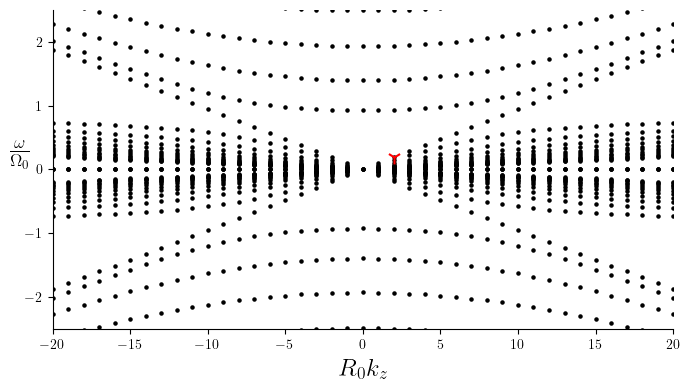

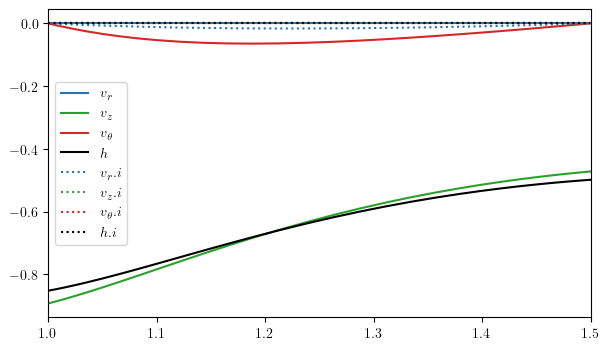

In [29]:
### Plot of an eigenmode

# aim for an eigenmode in the dispersion relation, located at (kTarget,omegaTarget)
# function getEigenMode shows the profiles of the closest one
kTarget     = 2
omegaTarget = 0.3

omegaFound,kFound,vr,vz,vθ,h = getEigenMode(omegaTarget,kTarget,ks,omegas,modes)
print("ω = ",np.round(omegaFound,3),", k = ",round(kFound,3))

### Frequencies plot to eye-check which mode we found
if True:
    fig,ax = plt.subplots()
    ax=simpleaxis(ax,r"$R_0k_z$",r"$\frac{\omega}{\Omega_0}$",rotation=0)
    img = ax.scatter(ks,omegas,c="black",s=5)
    ax.scatter([kFound],[omegaFound],s=100,c='red',marker='1')
    ax.axis((spaceKs[0],spaceKs[-1],-2.5,2.5))
    plt.tight_layout()
    plt.show()

        
plt.plot(r,vr.real,c="tab:blue",label=r"$v_r$")
plt.plot(r,vz.real,c="tab:green",label=r"$v_z$")
plt.plot(r,vθ.real,c="tab:red",label=r"$v_\theta$")
plt.plot(r,h.real,c="black",label=r"$h$")

plt.plot(r,vr.imag,':',c="tab:blue",label=r"$v_r.i$")
plt.plot(r,vz.imag,':',c="tab:green",label=r"$v_z.i$")
plt.plot(r,vθ.imag,':',c="tab:red",label=r"$v_\theta.i$")
plt.plot(r,h.imag,':',c="black",label=r"$h.i$")
plt.xlim((1,Rout))
plt.legend()
plt.show()